## Housing Affordability in Austin, Texas
Our analysis will go here

## Data Import and Cleanup
- Import dependencies
- Load data into dataframes
- Grab columns we want for analysis

In [1]:
# import data and dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# read in data into dataframes 
age_nativity = pd.read_csv("data/age_by_nativity.csv")
employment_by_industry = pd.read_csv("data/employment_by_industries.csv")
property_value = pd.read_csv("data/property_value.csv")
demographics = pd.read_csv("data/tdc_download_tool.csv")
wage_by_gender = pd.read_csv("data/wage_by_gender_in_common_jobs.csv")
wage_by_race = pd.read_csv("data/wage_by_race_and_ethnicity_in_common_jobs.csv")
austin_income = pd.read_csv("data/austin_median_household_income.csv")


In [3]:
# grab columns we want about propery data 
property_value = property_value[['ID Value Bucket',
                'Value Bucket',
               'Year',
               'Property Value by Bucket',
               'Property Value by Bucket Moe',
               'Geography',
               'share']]
property_value

,ID Value Bucket,Value Bucket,Year,Property Value by Bucket,Property Value by Bucket Moe,Geography,share
0,0,"Less Than $10,000",2017,1000376,16112.0,United States,0.013045
1,25,"$2,000,000 or More",2017,2224,832.0,"Austin, TX",0.013137
2,2,"$15,000 to $19,999",2017,484108,10315.0,United States,0.006313
3,3,"$20,000 to $24,999",2017,537939,9802.0,United States,0.007015
4,4,"$25,000 to $29,999",2017,495363,10768.0,United States,0.006460
5,5,"$30,000 to $34,999",2017,596891,10224.0,United States,0.007784
6,6,"$35,000 to $39,999",2017,447506,11066.0,United States,0.005836
7,7,"$40,000 to $49,999",2017,1167440,17521.0,United States,0.015224
8,8,"$50,000 to $59,999",2017,1398870,16934.0,United States,0.018242
9,9,"$60,000 to $69,999",2017,1668358,21640.0,United States,0.021756


In [4]:
# grab columns we want about population data 
age_nativity[['ID Age',
              'Age', 
              'Year', 
              'Birthplace', 
              'Birthplace Moe', 
              'nativity', 
              'share']]

,ID Age,Age,Year,Birthplace,Birthplace Moe,nativity,share
0,30,75 Years & Over,2017,28181,3700.0,Native Born,0.029642
1,3,5 to 17 Years,2017,123858,8350.0,Native Born,0.130279
2,6,18 to 24 Years,2017,82741,7676.0,Native Born,0.087030
3,9,25 to 34 Years,2017,164386,12126.0,Native Born,0.172908
4,12,35 to 44 Years,2017,110346,7788.0,Native Born,0.116066
5,15,45 to 54 Years,2017,83728,7449.0,Native Born,0.088069
6,18,55 to 59 Years,2017,40589,5632.0,Native Born,0.042693
7,21,60 & 61 Years,2017,14902,3400.0,Native Born,0.015675
8,24,62 to 64 Years,2017,18889,4191.0,Native Born,0.019868
9,27,65 to 74 Years,2017,46788,5639.0,Native Born,0.049214


In [5]:
# grab columns we want about wage data 
wage_by_gender[["Gender",
                "Year",
               "Detailed Occupation",
               "Average Wage",
               "Average Wage Appx MOE",
               "Total Population",
               "Total Population MOE Appx",
                "Geography"]]

wage_by_race[["Race",
             "Year",
             "Detailed Occupation",
             "Average Wage",
             "Average Wage Appx MOE",
             "Total Population",
             "Total Population MOE Appx",
             "Geography"]]

,Race,Year,Detailed Occupation,Average Wage,Average Wage Appx MOE,Total Population,Total Population MOE Appx,Geography
0,Black,2017,Miscellaneous managers,69171.764829,6422.316804,30548,4285.814751,Texas
1,Two or More Races,2017,Retail salespersons,21091.920452,8820.370169,8146,2215.159608,Texas
2,Two or More Races,2017,Driver/sales workers & truck drivers,39007.477377,9268.471191,4133,1578.103411,Texas
3,Two or More Races,2017,Miscellaneous managers,86430.587985,22866.284236,7524,2128.962714,Texas
4,Two or More Races,2017,Elementary & middle school teachers,45618.450450,5322.337122,6882,2036.161331,Texas
5,White,2017,Elementary & middle school teachers,43900.600405,1038.657715,308705,13471.057979,Texas
6,White,2017,Miscellaneous managers,103115.965131,4519.679010,283576,12924.476788,Texas
7,White,2017,Driver/sales workers & truck drivers,43602.265320,1817.940365,235806,11808.791289,Texas
8,White,2017,Cashiers,14254.146975,946.648469,203041,10972.379923,Texas
9,White,2017,Retail salespersons,29707.689519,2133.340039,220445,11424.855114,Texas


In [6]:
# grab columns we want about industry data
employment_by_industry[['Industry', 
                        'Year', 
                        'Workforce by Industry and Gender', 
                        'Workforce by Industry and Gender Moe']]

,Industry,Year,Workforce by Industry and Gender,Workforce by Industry and Gender Moe
0,Educational Services,2017,58591,4083.898750
1,Public Administration,2017,29054,2868.084378
2,"Other Services, Except Public Administration",2017,26993,3119.346246
3,"Mining, Quarrying, & Oil & Gas Extraction",2017,2802,875.727126
4,Accommodation & Food Services,2017,48958,3997.982741
5,Construction,2017,41460,5012.614188
6,"Arts, Entertainment, & Recreation",2017,13123,2272.642955
7,Manufacturing,2017,41586,4264.172604
8,Health Care & Social Assistance,2017,52161,4151.356044
9,Wholesale Trade,2017,9351,1756.259662


In [7]:
#clean up demographics data 
demographics["White Male"] = demographics["White Male"].str.replace(',','')
demographics["White Male"] = demographics["White Male"].astype(int)
demographics["White Female"] = demographics["White Female"].str.replace(',','')
demographics["White Female"] = demographics["White Female"].astype(int)
demographics["Black Male"] = demographics["Black Male"].str.replace(',','')
demographics["Black Male"] = demographics["Black Male"].astype(int)
demographics["Black Female"] = demographics["Black Female"].str.replace(',','')
demographics["Black Female"] = demographics["Black Female"].astype(int)
demographics["Hispanic Male"] = demographics["Hispanic Male"].str.replace(',','')
demographics["Hispanic Male"] = demographics["Hispanic Male"].astype(int)
demographics["Hispanic Female"] = demographics["Hispanic Female"].str.replace(',','')
demographics["Hispanic Female"] = demographics["Hispanic Female"].astype(int)



demographics = demographics[["Year",
             "Age",
             "White Male",
             "White Female",
             "Black Male",
             "Black Female",
             "Hispanic Male",
             "Hispanic Female"]]

## Austin Basics (Ashley)
- Propery values over time 
- Population changes over time 
- Wage distribution over time

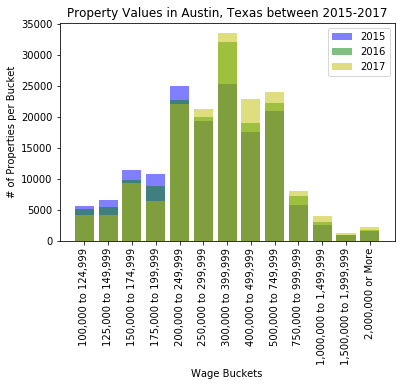

In [8]:
# get necessary data from table for chart
atx_property = property_value.loc[property_value["Geography"] == "Austin, TX"]
atx_property = atx_property.loc[atx_property["ID Value Bucket"] >= 13]
atx_property = atx_property.sort_values("ID Value Bucket")
year1 = atx_property.loc[atx_property["Year"] == 2015]
year2 = atx_property.loc[atx_property["Year"] == 2016]
year3 = atx_property.loc[atx_property["Year"] == 2017]


#identify x/y values and error for chart
x1 = year1["ID Value Bucket"]
y1 = year1["Property Value by Bucket"]
x2 = year2["ID Value Bucket"]
y2 = year2["Property Value by Bucket"]
x3 = year3["ID Value Bucket"]
y3 = year3["Property Value by Bucket"]

# graph values on a bar chart 
fig, ax = plt.subplots()
ax.bar(x_axis,y1,alpha=0.5, label="2015", color='b')
ax.bar(x_axis,y2, alpha=0.5, label="2016", color='g')
ax.bar(x_axis,y3,alpha=0.5,label ="2017",color='y')

# add labels and title 
ax.set_xlabel("Wage Buckets")
ax.set_ylabel("# of Properties per Bucket")
ax.set_title("Property Values in Austin, Texas between 2015-2017")
plt.xticks(tick_locations, rotation = 'vertical')
ax.set_xticklabels(('100,000 to 124,999',
                    '125,000 to 149,999',
                    '150,000 to 174,999',
                    '175,000 to 199,999',
                    '200,000 to 249,999',
                    '250,000 to 299,999',
                    '300,000 to 399,999',
                    '400,000 to 499,999',
                    '500,000 to 749,999',
                    '750,000 to 999,999',
                    '1,000,000 to 1,499,999',
                    '1,500,000 to 1,999,999',
                    '2,000,000 or More'))
ax.legend()

In [24]:
# charts on population changes over time 
# show which working ages live here
# include age nativity

atx_demo = demographics.sort_values("Age")
year1 = atx_demo.loc[atx_demo["Year"] == 2015]
year2 = atx_demo.loc[atx_demo["Year"] == 2016]
year3 = atx_demo.loc[atx_demo["Year"] == 2017]

a = year1.groupby("Age")

# #identify x/y values and error for chart
# x1 = year1["ID Value Bucket"]
# y1 = year1["Property Value by Bucket"]
# x2 = year2["ID Value Bucket"]
# y2 = year2["Property Value by Bucket"]
# x3 = year3["ID Value Bucket"]
# y3 = year3["Property Value by Bucket"]

# # graph values on a bar chart 
# fig, ax = plt.subplots()
# ax.bar(x_axis,y1,alpha=0.5, label="2015", color='b')
# ax.bar(x_axis,y2, alpha=0.5, label="2016", color='g')
# ax.bar(x_axis,y3,alpha=0.5,label ="2017",color='y')

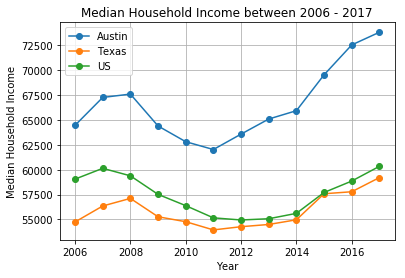

In [10]:
# charts on wage distribution over time 

# identify x and y for different income values
x_income = austin_income["Date"]
y_income = austin_income["Austin"]
texas_income = austin_income["Texas"]
us_income = austin_income["US"]

# plot values and set x/y axis and title
plt.plot(x_income,y_income, marker='o',label="Austin")
plt.plot(x_income,texas_income,marker='o',label="Texas")
plt.plot(x_income,us_income,marker='o',label="US")
plt.xlabel("Year")
plt.ylabel("Median Household Income")
plt.title("Median Household Income between 2006 - 2017")
plt.legend()
plt.grid()

## Austin Income Differences (Valeria & Vincent)
- Wage vs gender over time 
- Wage vs race over time 

In [11]:
# charts on wage vs gender over time 
# what is the gender/occupation that can afford to live in austin each year?
# what is the gender/occupation that cannot afford to live in austin each year? 

In [12]:
# charts on wage vs race over time 
# what is the race/occupation that can afford to live in austin each year?
# what is the race/occupation that cannot afford to live in austin each year?

## Austin Industry Information (Mark)
- Changes in industry over time 

In [13]:
# charts on industry changes over time 
# what trends do we see in industry?
# which genders/races typically work in the top industry? can they afford to live in austin each year?
# which genders/races typically work in the bottom industry? can they afford to live in austin each year? 